In [65]:
import sklearn
print(sklearn.__version__)

1.2.2


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import joblib # for saving models

In [69]:
male_players_legacy = pd.read_csv("C:\\Users\\user\\Downloads\\Sports Prediction app using ML model\\male_players (legacy).csv", low_memory = False)
players_22 = pd.read_csv("C:\\Users\\user\\Downloads\\Sports Prediction app using ML model\\players_22.csv", low_memory = False)

In [70]:
male_players_legacy.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [71]:
# Cleaning up the independent dataset

# Remove duplicates (if any)
male_players_legacy = male_players_legacy.drop_duplicates()

# Dropping columns with missing values 
male_players_legacy_cleaned = male_players_legacy.dropna(axis=1, how='any')

# Checking the cleaned DataFrame for confirmation
cleaned_missing_values = male_players_legacy_cleaned.isnull().sum()
cleaned_missing_values.info

<bound method Series.info of player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 84, dtype: int64>

In [72]:
male_players_legacy_cleaned.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'age', 'dob', 'height_cm', 'weight_kg',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'real_face', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending

In [73]:
# Feature Extraction by creating a new age_group column
male_players_legacy_cleaned['age_group'] = pd.cut(
    male_players_legacy_cleaned['age'],
    bins=[0, 20, 30, 40, 100],
    labels=['<20', '20-30', '30-40', '40+']
)

# Convert age_group into numeric form for correlation
male_players_legacy_cleaned['age_group_encoded'] = male_players_legacy_cleaned['age_group'].cat.codes

C:\Users\user\AppData\Local\Temp\ipykernel_38872\2420434559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_players_legacy_cleaned['age_group'] = pd.cut(
C:\Users\user\AppData\Local\Temp\ipykernel_38872\2420434559.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_players_legacy_cleaned['age_group_encoded'] = male_players_legacy_cleaned['age_group'].cat.codes


Top 15 features correlated with player overall rating:

overall                     1.000000
movement_reactions          0.845753
potential                   0.695362
attacking_short_passing     0.499757
mentality_vision            0.493282
international_reputation    0.485234
skill_long_passing          0.483808
power_shot_power            0.480297
age                         0.458390
skill_ball_control          0.457011
age_group_encoded           0.420168
skill_curve                 0.415863
power_long_shots            0.409086
mentality_aggression        0.398310
attacking_crossing          0.396833
Name: overall, dtype: float64


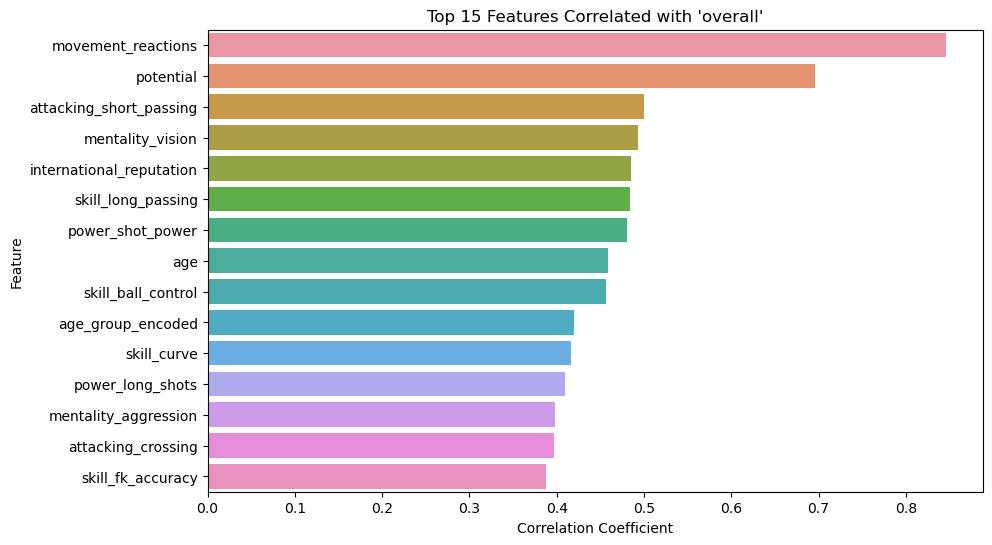

In [74]:
numeric_df = male_players_legacy_cleaned.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Get correlations with the target variable
target = 'overall'
correlations = corr_matrix[target].sort_values(ascending=False)

# Display top correlated features
print("Top 15 features correlated with player overall rating:\n")
print(correlations.head(15))


# Visualize top correlations (excluding the target itself)
top_features = correlations.drop(target).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title(f"Top 15 Features Correlated with '{target}'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

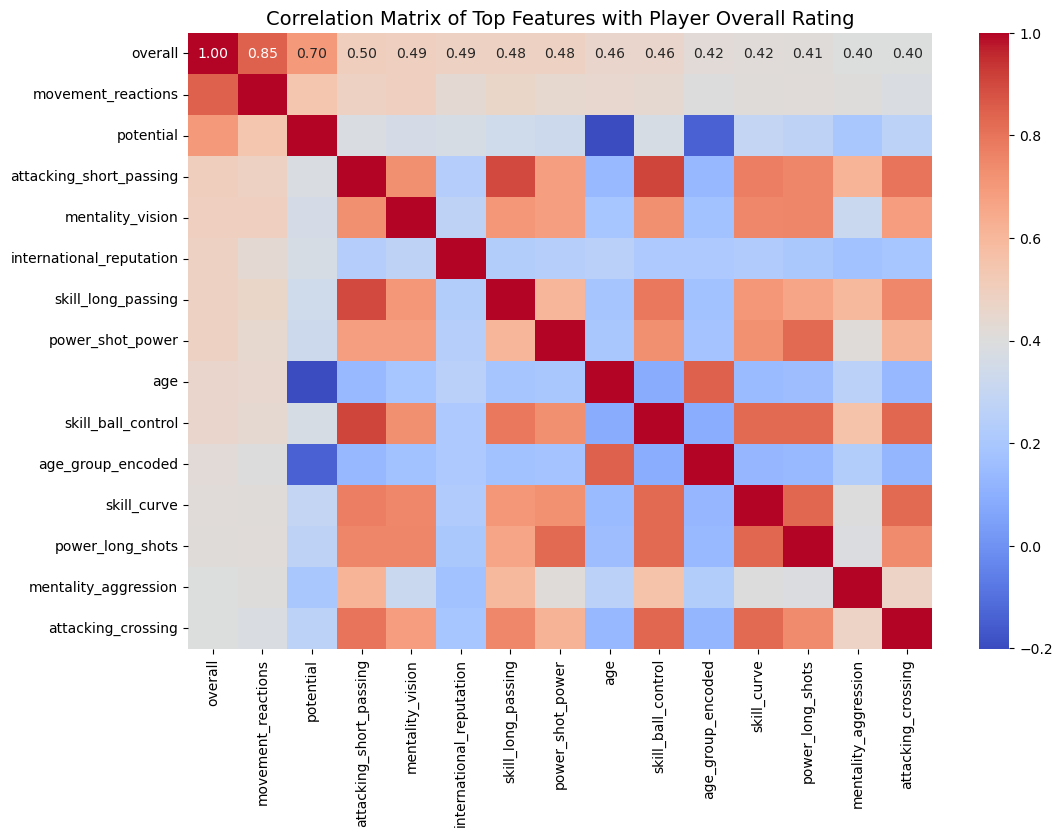

In [75]:
# Calculate correlation matrix
# Include 'overall' + your top correlated features
corr_features = [
    'overall', 'movement_reactions', 'potential', 'attacking_short_passing',
    'mentality_vision', 'international_reputation', 'skill_long_passing',
    'power_shot_power', 'age', 'skill_ball_control', 'age_group_encoded',
    'skill_curve', 'power_long_shots', 'mentality_aggression', 'attacking_crossing'
]

corr_matrix = male_players_legacy_cleaned[corr_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top Features with Player Overall Rating", fontsize=14)
plt.show()

In [76]:
features = [
    'movement_reactions', 'potential', 'attacking_short_passing',
    'mentality_vision', 'international_reputation', 'skill_long_passing',
    'power_shot_power', 'age', 'skill_ball_control', 'age_group_encoded',
    'skill_curve', 'power_long_shots', 'mentality_aggression', 'attacking_crossing'
]

X = male_players_legacy_cleaned[features]
y = male_players_legacy_cleaned['overall']


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []
best_model = None
best_score = -np.inf  # we’ll maximize R²

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        "Model": name,
        "R²": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    })

    # Track the best model by R²
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_name = name

# Show results
results_df = pd.DataFrame(results)
print(results_df)

# Save the best model
joblib.dump(best_model, f"{best_name.replace(' ', '_').lower()}_model.pkl")
print(f"\nBest model '{best_name}' saved as '{best_name.replace(' ', '_').lower()}_model.pkl'")

               Model        R²       MAE       MSE      RMSE
0  Linear Regression  0.899867  1.733449  4.962948  2.227767
1      Decision Tree  0.932468  1.154207  3.347101  1.829508
2      Random Forest  0.967743  0.830469  1.598747  1.264416

Best model 'Random Forest' saved as 'random_forest_model.pkl'


In [79]:
players_22.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [80]:
# Recreate age group and encode
players_22['age_group'] = pd.cut(players_22['age'], bins=[0, 20, 30, 40, 100], labels=['<20', '20-30', '30-40', '40+'])
players_22['age_group_encoded'] = players_22['age_group'].cat.codes

# Use the same features as during training
relevant_features = [
    'movement_reactions', 'potential', 'attacking_short_passing',
    'mentality_vision', 'international_reputation', 'skill_long_passing',
    'power_shot_power', 'age', 'skill_ball_control', 'age_group_encoded',
    'skill_curve', 'power_long_shots', 'mentality_aggression',
    'attacking_crossing'
]

X_new = players_22[relevant_features]
y_new = players_22['overall']

In [82]:
y_pred_new = best_model.predict(X_new)

r2 = r2_score(y_new, y_pred_new)
mae = mean_absolute_error(y_new, y_pred_new)
mse = mean_squared_error(y_new, y_pred_new)
rmse = np.sqrt(mse)

print("Performance on players_22 dataset:")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

Performance on players_22 dataset:
R²: 0.990
MAE: 0.397
MSE: 0.473
RMSE: 0.687


In [84]:
# Train using top 5 features
import pickle

top_5_features = ['movement_reactions', 'potential', 'attacking_short_passing',
    'mentality_vision', 'international_reputation']
X_top5 =  male_players_legacy_cleaned[top_5_features]
y =  male_players_legacy_cleaned['overall']

X_train, X_test, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=42)
model_top5 = RandomForestRegressor(random_state=42)
model_top5.fit(X_train, y_train)
y_pred = model_top5.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

with open("C:\\Users\\user\\Downloads\\Sports Prediction app using ML model\\top5_model.pkl", "wb") as f:
    pickle.dump(model_top5, f)

R²: 0.8406415803207165
MAE: 1.9915006952352314
RMSE: 2.8104033410989127
